[*********************100%***********************]  1 of 1 completed


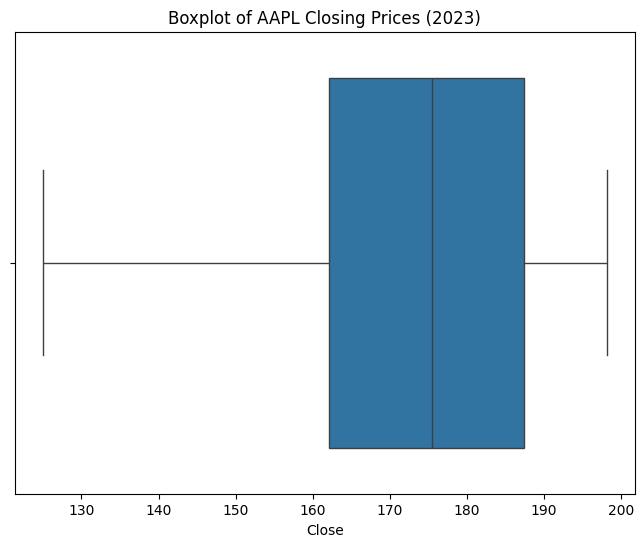

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch stock data from Yahoo Finance (e.g., Apple stock - AAPL)
stock = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

# Reset the index so the Date column is accessible
stock.reset_index(inplace=True)

# Create a boxplot for the 'Close' prices
plt.figure(figsize=(8, 6))
sns.boxplot(data=stock, x='Close')

# Add a title
plt.title('Boxplot of AAPL Closing Prices (2023)')
# Save the figure
plt.savefig('figTT1.png', dpi=300, bbox_inches='tight')
# Display the plot
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import numpy as np
# Drop the 'Date' column (if it exists)
if 'Date' in stock.columns:
    stock.drop(columns=['Date'], inplace=True)
    print("'Date' column dropped successfully.")
else:
    print("'Date' column not found.")

# Check the DataFrame after dropping the column
print(stock.head())
# Check the first few rows
print(stock.head())



# Extract the 'Close' column as the target for prediction
data = stock['Close'].values.reshape(-1, 1)

# Feature Scaling (Normalizing the data to between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create a function to create datasets with a given timestep (e.g., 60)
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Prepare training data
time_step = 10  # Using the last 60 days to predict the next day's closing price
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='Adagrad', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=2000)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse the scaling to get the original values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])



'Date' column dropped successfully.
         Open        High         Low       Close   Adj Close     Volume
0  130.279999  130.899994  124.169998  125.070000  123.904625  112117500
1  126.889999  128.660004  125.080002  126.360001  125.182610   89113600
2  127.129997  127.769997  124.760002  125.019997  123.855087   80962700
3  126.010002  130.289993  124.889999  129.619995  128.412231   87754700
4  130.470001  133.410004  129.889999  130.149994  128.937271   70790800
         Open        High         Low       Close   Adj Close     Volume
0  130.279999  130.899994  124.169998  125.070000  123.904625  112117500
1  126.889999  128.660004  125.080002  126.360001  125.182610   89113600
2  127.129997  127.769997  124.760002  125.019997  123.855087   80962700
3  126.010002  130.289993  124.889999  129.619995  128.412231   87754700
4  130.470001  133.410004  129.889999  130.149994  128.937271   70790800


C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3987
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.3529
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.3089
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2770
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2431
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2301
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2156
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1982 
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1800
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1738
Epoch 11/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1587 
Epoch 12/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1419
Epoch 13/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1371
Epoch 14/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1226
Epoch 15/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1176
Ep

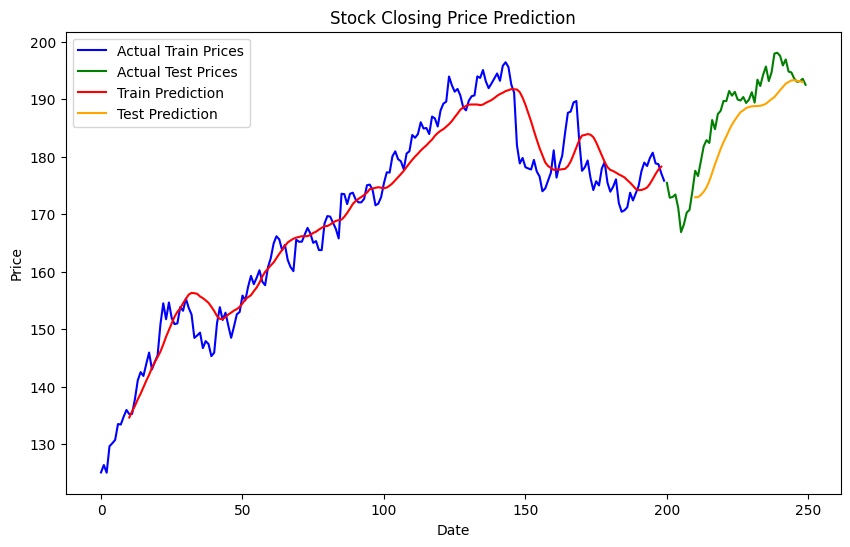

In [4]:
# Correcting the mismatch between stock.index and train_predict lengths
# Adjust the index range to match the shape of train_predict
plt.figure(figsize=(10, 6))

# Plotting the actual train prices
plt.plot(stock.index[:train_size], scaler.inverse_transform(train_data), label='Actual Train Prices', color='blue')

# Plotting the actual test prices
plt.plot(stock.index[train_size:], scaler.inverse_transform(test_data), label='Actual Test Prices', color='green')

# Correct the range of dates for plotting train_predict
# The number of predictions is len(train_predict), not len(stock.index[time_step:train_size])
plt.plot(stock.index[time_step:time_step+len(train_predict)], train_predict, label='Train Prediction', color='red')

# Correct the range of dates for plotting test_predict
plt.plot(stock.index[train_size + time_step:train_size + time_step + len(test_predict)], test_predict, label='Test Prediction', color='orange')

# Title and labels
plt.title('Stock Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
# Save the figure
plt.savefig('figT1.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate MSE, RMSE, and MAE for train data
mse_train = mean_squared_error(y_train[0], train_predict)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train[0], train_predict)

# Calculate MSE, RMSE, and MAE for test data
mse_test = mean_squared_error(y_test[0], test_predict)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test[0], test_predict)

# Print the results
print("Training Data Evaluation:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"MAE: {mae_train}")

print("\nTesting Data Evaluation:")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"MAE: {mae_test}")

Training Data Evaluation:
MSE: 17.37415420358246
RMSE: 4.168231543902337
MAE: 3.2598133389911954

Testing Data Evaluation:
MSE: 25.451417976369445
RMSE: 5.044939838726468
MAE: 4.34737376677684


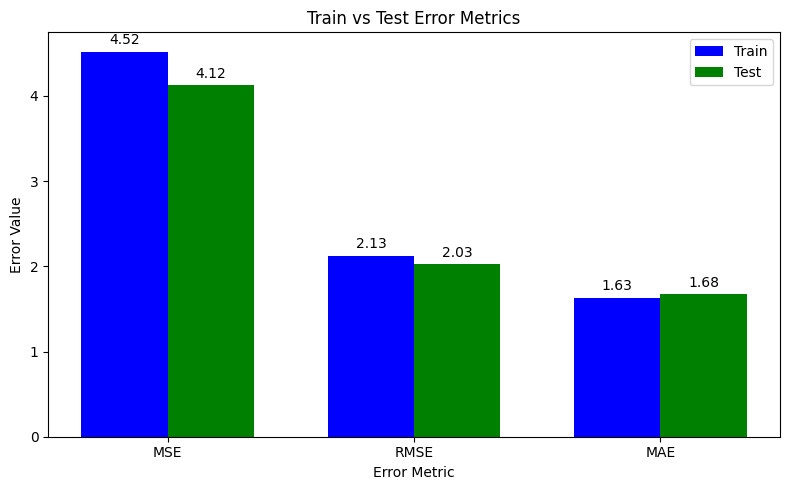

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume y_train, train_predict, y_test, and test_predict are already defined

# Calculate MSE, RMSE, and MAE for train data
mse_train = mean_squared_error(y_train[0], train_predict)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train[0], train_predict)

# Calculate MSE, RMSE, and MAE for test data
mse_test = mean_squared_error(y_test[0], test_predict)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test[0], test_predict)

# Store the results in a list for plotting
train_errors = [mse_train, rmse_train, mae_train]
test_errors = [mse_test, rmse_test, mae_test]
error_labels = ['MSE', 'RMSE', 'MAE']

# Plot the results
x = np.arange(len(error_labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, train_errors, width, label='Train', color='blue')
rects2 = ax.bar(x + width/2, test_errors, width, label='Test', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Error Metric')
ax.set_ylabel('Error Value')
ax.set_title('Train vs Test Error Metrics')
ax.set_xticks(x)
ax.set_xticklabels(error_labels)
ax.legend()

# Attach a label on each bar displaying the height
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Display the plot
plt.tight_layout()
plt.show()


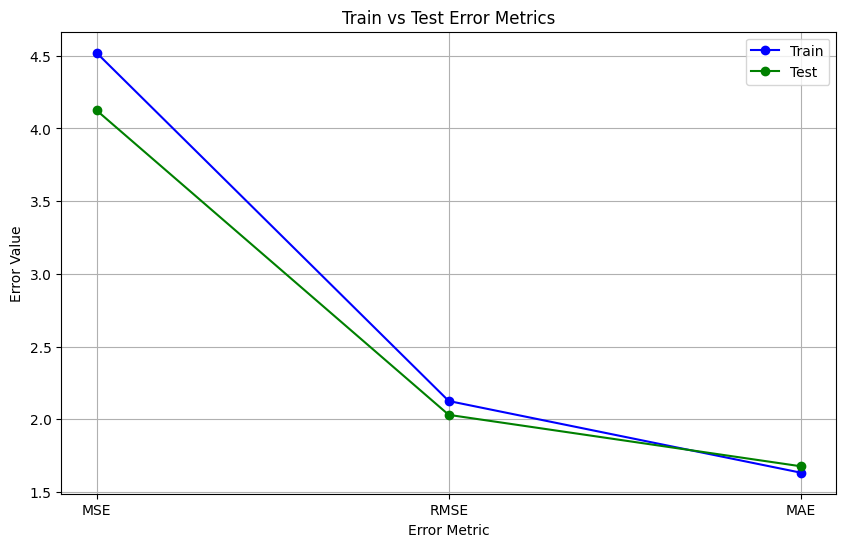

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume y_train, train_predict, y_test, test_predict are already defined

# Calculate MSE, RMSE, and MAE for train data
mse_train = mean_squared_error(y_train[0], train_predict)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train[0], train_predict)

# Calculate MSE, RMSE, and MAE for test data
mse_test = mean_squared_error(y_test[0], test_predict)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test[0], test_predict)

# Store the results for plotting
train_errors = [mse_train, rmse_train, mae_train]
test_errors = [mse_test, rmse_test, mae_test]
metrics = ['MSE', 'RMSE', 'MAE']

# Plotting
plt.figure(figsize=(10, 6))

# Plot for train data
plt.plot(metrics, train_errors, label='Train', marker='o', color='blue')

# Plot for test data
plt.plot(metrics, test_errors, label='Test', marker='o', color='green')

# Titles and labels
plt.title('Train vs Test Error Metrics')
plt.xlabel('Error Metric')
plt.ylabel('Error Value')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
